<a href="https://colab.research.google.com/github/Salmaalawadi/S/blob/main/Final_genetic_variation_(Salma_Alawadi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd

In [113]:
import numpy as np

In [114]:
# Reading the variation TSV file directly as a compresed (.gz) from URL
# NA12878 is person2 in the pedigree

person_2 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/NA12878.tsv.gz?raw=true', compression='gzip')
person_2.head()

chr    pos                      id ref alt
0  chr1  14677             rs201327123   G   A
1  chr1  15922             rs375964566   A   G
2  chr1  15956             rs112448831   G   A
3  chr1  16014  rs113442401;rs75082847   C   T
4  chr1  16298   rs62636498;rs77798508   C   T

In [116]:
len(person_2)

4489434

In [117]:
df = person_2
sec_chr = df.loc[df['chr'] == 'chr16']
print (sec_chr)

           chr       pos                                  id  ref alt
3631593  chr16     10054                          rs62028702    A   C
3631594  chr16     10095                          rs62028704    G   T
3631595  chr16     10185                         rs117018261    C   G
3631596  chr16     10214                         rs112858078    A   G
3631597  chr16     10291                          rs76368850    T   C
...        ...       ...                                 ...  ...  ..
3763748  chr16  90215707  rs370407699;rs553057347;rs57592413    A  AT
3763749  chr16  90216009                         rs375777462    G   A
3763750  chr16  90220205                         rs199953405  GTC   G
3763751  chr16  90220432                          rs28410953    C   G
3763752  chr16  90226358                           rs9746831    G   C

[132160 rows x 5 columns]


In [118]:
sec_chr = person_2.loc[person_2['chr'] == 'chr16']
print(sec_chr)

           chr       pos                                  id  ref alt
3631593  chr16     10054                          rs62028702    A   C
3631594  chr16     10095                          rs62028704    G   T
3631595  chr16     10185                         rs117018261    C   G
3631596  chr16     10214                         rs112858078    A   G
3631597  chr16     10291                          rs76368850    T   C
...        ...       ...                                 ...  ...  ..
3763748  chr16  90215707  rs370407699;rs553057347;rs57592413    A  AT
3763749  chr16  90216009                         rs375777462    G   A
3763750  chr16  90220205                         rs199953405  GTC   G
3763751  chr16  90220432                          rs28410953    C   G
3763752  chr16  90226358                           rs9746831    G   C

[132160 rows x 5 columns]


In [122]:
#length of chr 16 = 90338345
#person_2 = Number of variants of chr 16 = 132160
#form bins / 1000
list_of_bins_variants = []
chr_16_length = 90338345
for bin in range(0, chr_16_length, 1000):
    variants_selected = sec_chr[((sec_chr['pos'] >= bin) & (sec_chr['pos'] <= bin + 1000))]
    #print(f"For range from {bin} to {bin + 999} number of variants is {len(variants_selected.index)}")
    list_of_bins_variants.append([bin, bin + 1000, len(variants_selected.index)])


In [137]:
Numbers_of_Extracted = pd.DataFrame(list_of_bins_variants, columns = ["chromosome regions", "End", "Number of Variants"])
Numbers_of_Extracted.sort_values(by="Number of Variants", ascending=False)

chromosome regions       End  Number of Variants
2088              2088000   2089000                  67
2084              2084000   2085000                  65
2086              2086000   2087000                  46
2079              2079000   2080000                  45
12563            12563000  12564000                  39
...                   ...       ...                 ...
41659            41659000  41660000                   0
41660            41660000  41661000                   0
41661            41661000  41662000                   0
41662            41662000  41663000                   0
90338            90338000  90339000                   0

[90339 rows x 3 columns]

In [138]:
print(Numbers_of_Extracted)

       chromosome regions       End  Number of Variants
0                       0      1000                   0
1                    1000      2000                   0
2                    2000      3000                   0
3                    3000      4000                   0
4                    4000      5000                   0
...                   ...       ...                 ...
90334            90334000  90335000                   0
90335            90335000  90336000                   0
90336            90336000  90337000                   0
90337            90337000  90338000                   0
90338            90338000  90339000                   0

[90339 rows x 3 columns]


In [139]:
#length chromosome 16 = 90338345 
regions=90338345/1000
print (regions)

90338.345


In [142]:
variants, regions = 132160, 90338.345
results = variants/regions
print(results)

1.4629446665200696


visulization of density


In [125]:
import pandas as pd

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

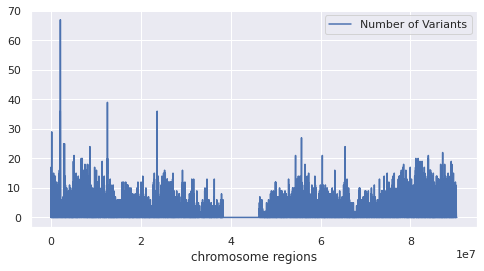

In [127]:
import pandas as pd
ax = plt.gca()
Numbers_of_Extracted.plot(kind='line', x ='chromosome regions', y ='Number of Variants',ax=ax)
plt.show()

Text(0.5, 1.0, 'Density of regions per Kb')

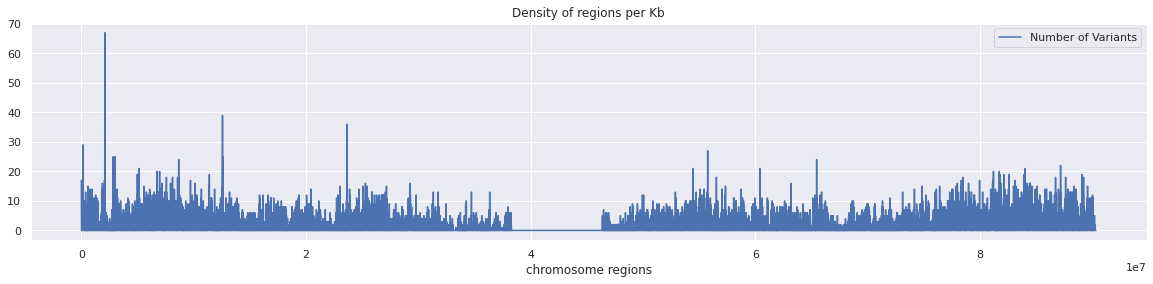

In [128]:
Numbers_of_Extracted.plot(x ='chromosome regions', y ='Number of Variants', kind = 'line', figsize=(20,4))
plt.title('Density of regions per Kb')

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


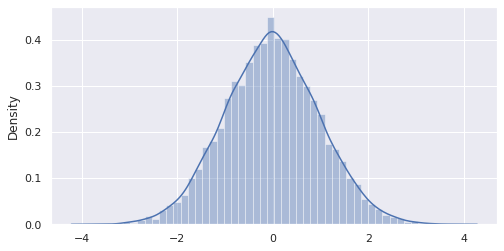

In [130]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(9000)
ax = sns.distplot(x)
plt.show()

In [131]:
# plot SNP density ==========================================
def plot_windowed_variant_density(pos, window_size, title, ax):
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    # compute variant density in each window
    count, _ = np.histogram(pos, bins=bins)
    y= count
    # plot
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (Mb)')
    ax.set_ylabel('Count')
    if title:
        ax.set_title(title)

#Average denisty of SNV per Kb (1000) of chr 16 equals 1.4629446665200696
#The region on chromosome 16 with the largest number of variations starting from 20880000 to 20890000(index = 2088) , Numbers of variants = 67. 







Questions #2 

In [39]:
person_2.groupby('chr')['pos'].apply(list)

chr
chr1     [14677, 15922, 15956, 16014, 16298, 28511, 285...
chr10    [10430, 11528, 13103, 13107, 13155, 13254, 135...
chr11    [72980, 101791, 103253, 103493, 122941, 122980...
chr12    [10175, 10178, 10188, 10320, 11522, 11861, 122...
chr13    [16000687, 16000691, 16001196, 16001357, 16001...
chr14    [16023299, 16023307, 16023334, 16024591, 16026...
chr15    [17010279, 17010288, 17010299, 17010332, 17010...
chr16    [10054, 10095, 10185, 10214, 10291, 10349, 103...
chr17    [75596, 84686, 93495, 114101, 114123, 114276, ...
chr18    [10621, 10813, 10841, 11882, 12359, 14929, 213...
chr19    [80833, 80840, 91106, 92093, 92112, 108091, 10...
chr2     [10249, 10271, 10283, 10286, 10437, 11320, 132...
chr20    [61558, 61561, 61566, 61568, 61580, 61581, 616...
chr21    [5063904, 5063917, 5064036, 5070298, 5070331, ...
chr22    [10522819, 10526438, 10526445, 10526739, 10527...
chr3     [10870, 10877, 10971, 10976, 11919, 11929, 119...
chr4     [10568, 10580, 10771, 10791, 10834, 10895, 

In [93]:
df = person_2
select_chr = df.loc[df['chr'] == 'chrx']
print (sec_chr)

           chr       pos                                  id  ref alt  \
3631593  chr16     10054                          rs62028702    A   C   
3631594  chr16     10095                          rs62028704    G   T   
3631595  chr16     10185                         rs117018261    C   G   
3631596  chr16     10214                         rs112858078    A   G   
3631597  chr16     10291                          rs76368850    T   C   
...        ...       ...                                 ...  ...  ..   
3763748  chr16  90215707  rs370407699;rs553057347;rs57592413    A  AT   
3763749  chr16  90216009                         rs375777462    G   A   
3763750  chr16  90220205                         rs199953405  GTC   G   
3763751  chr16  90220432                          rs28410953    C   G   
3763752  chr16  90226358                           rs9746831    G   C   

                           binned  
3631593        (10000.0, 11000.0]  
3631594        (10000.0, 11000.0]  
3631595        

In [96]:
len(person_2)

4489434

In [41]:
list_of_bins_variants = []
chr_x_length = 90227000
for bin in range(0, chr_16_length, 1000):
    tmp_selected = select_chr[((select_chr['pos'] > bin) & (select_chr['pos'] < bin + 1000))]
    #print(f"For range from {bin} to {bin + 1000} number of variants is {len(tmp_selected.index)}")
    list_of_bins_variants.append([bin, bin + 1000, len(tmp_selected.index)])

In [42]:
import pandas as pd
import numpy as np

In [43]:
First_Unknown = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/Unknown1.tsv.gz?raw=true', compression='gzip')
First_Unknown.head()

chr  pos                          id ref alt
0  chr1    15956             rs112448831   G   A
1  chr1    16014  rs113442401;rs75082847   C   T
2  chr1    16068             rs372319358   T   C
3  chr1    16298   rs62636498;rs77798508   C   T
4  chr1    28511             rs773821537   G   A

In [44]:
Chromosome_X1 = First_Unknown.loc[First_Unknown['chr'] == 'chrX']
print(Chromosome_X1)

          chr    pos               id ref alt
4312123  chrX      13534   rs28522163   G   A
4312124  chrX      17527  rs184947665   G   A
4312125  chrX      26425   rs35672226   C   A
4312126  chrX      26883   rs28536534   C   T
4312127  chrX      31328  rs755410834   A   G
...       ...        ...          ...  ..  ..
4414341  chrX  156026077    rs5940665   G   A
4414342  chrX  156027070  rs755768434   G  GC
4414343  chrX  156028398  rs376846075  CA   C
4414344  chrX  156028417  rs145177981   C   G
4414345  chrX  156028989  rs143379270   C   G

[102223 rows x 5 columns]


In [61]:
len(Chromosome_X1)

102223

In [45]:
Chromosome_X1['pos    '] > 10000
Chromosome_X1[(Chromosome_X1['pos    '] > 10000) & (Chromosome_X1['pos    '] < 10999)]
chr_X_length = 156040895
for K in range(0, chr_X_length, 1000):
  variants = Chromosome_X1[((Chromosome_X1['pos    ']> K) & (Chromosome_X1['pos    ']< K + 1000))]
  print(f"For range from {K} to {K + 1000} number of variants is {len(variants.index)}")

Streaming output truncated to the last 5000 lines.
For range from 151041000 to 151042000 number of variants is 1
For range from 151042000 to 151043000 number of variants is 0
For range from 151043000 to 151044000 number of variants is 0
For range from 151044000 to 151045000 number of variants is 0
For range from 151045000 to 151046000 number of variants is 0
For range from 151046000 to 151047000 number of variants is 0
For range from 151047000 to 151048000 number of variants is 0
For range from 151048000 to 151049000 number of variants is 0
For range from 151049000 to 151050000 number of variants is 0
For range from 151050000 to 151051000 number of variants is 0
For range from 151051000 to 151052000 number of variants is 0
For range from 151052000 to 151053000 number of variants is 0
For range from 151053000 to 151054000 number of variants is 0
For range from 151054000 to 151055000 number of variants is 0
For range from 151055000 to 151056000 number of variants is 0
For range from 1510

In [46]:
list_of_Chr_X1_variants = []
chr_X_length = 156040895
for bin in range(0, chr_X_length, 1000):
    selected_variants = Chromosome_X1[((Chromosome_X1['pos    '] > bin) & (Chromosome_X1['pos    '] < bin + 1000))]
    #print(f"For range from {bin} to {bin + 1000} number of variants is {len(selected_variants.index)}")
    list_of_Chr_X1_variants.append([bin, bin + 1000, len(selected_variants.index)])

In [56]:
Final_Chromosome_X1 = pd.DataFrame(list_of_Chr_X1_variants, columns = ["chromosome regions", "End", "SNPs count"])
Final_Chromosome_X1.sort_values(by="SNPs count", ascending = False)

chromosome regions        End  SNPs count
154030           154030000  154031000         159
154031           154031000  154032000          73
154032           154032000  154033000          34
138711           138711000  138712000          23
71119             71119000   71120000          21
...                    ...        ...         ...
61328             61328000   61329000           0
61327             61327000   61328000           0
61326             61326000   61327000           0
61325             61325000   61326000           0
156040           156040000  156041000           0

[156041 rows x 3 columns]

In [51]:
Second_Unknown = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/Unknown2.tsv.gz?raw=true', compression='gzip')
Second_Unknown.head()

chr  pos                          id ref alt
0  chr1    15956             rs112448831   G   A
1  chr1    16014  rs113442401;rs75082847   C   T
2  chr1    16288             rs113141985   C   G
3  chr1    16298   rs62636498;rs77798508   C   T
4  chr1    16378             rs148220436   T   C

In [52]:
Chromosome_X2 = Second_Unknown.loc[Second_Unknown['chr'] == 'chrX']
print(Chromosome_X2)

          chr    pos               id ref alt
4301508  chrX      14352   rs28679710   C   G
4301509  chrX      14356   rs28372078   A   T
4301510  chrX      17527  rs184947665   G   A
4301511  chrX      19360            .   G   A
4301512  chrX      25569  rs768963541   G   A
...       ...        ...          ...  ..  ..
4407747  chrX  156027070  rs755768434   G  GC
4407748  chrX  156027074            .   G   C
4407749  chrX  156029656  rs368859346  TA   T
4407750  chrX  156029663  rs867272774   G   C
4407751  chrX  156029711  rs376348169   C   T

[106244 rows x 5 columns]


In [53]:
Chromosome_X2['pos    '] > 10000
Chromosome_X2[(Chromosome_X1['pos    '] > 10000) & (Chromosome_X2['pos    '] < 10999)]
chr_X_length = 156040895
for K in range(0, chr_X_length, 1000):
  variants = Chromosome_X2[((Chromosome_X2['pos    ']> K) & (Chromosome_X2['pos    ']< K + 1000))]
  print(f"For range from {K} to {K + 1000} number of variants is {len(variants.index)}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Streaming output truncated to the last 5000 lines.
For range from 151041000 to 151042000 number of variants is 4
For range from 151042000 to 151043000 number of variants is 7
For range from 151043000 to 151044000 number of variants is 0
For range from 151044000 to 151045000 number of variants is 2
For range from 151045000 to 151046000 number of variants is 0
For range from 151046000 to 151047000 number of variants is 1
For range from 151047000 to 151048000 number of variants is 2
For range from 151048000 to 151049000 number of variants is 2
For range from 151049000 to 151050000 number of variants is 1
For range from 151050000 to 151051000 number of variants is 0
For range from 151051000 to 151052000 number of variants is 2
For range from 151052000 to 151053000 number of variants is 0
For range from 151053000 to 151054000 number of variants is 4
For range from 151054000 to 151055000 number of variants is 3
For range from 151055000 to 151056000 number of variants is 0
For range from 1510

In [54]:
list_of_Chr_X2_variants = []
chr_X_length = 156040895
for bin in range(0, chr_X_length, 1000):
    selected_variants2 = Chromosome_X2[((Chromosome_X2['pos    '] > bin) & (Chromosome_X2['pos    '] < bin + 1000))]
    #print(f"For range from {bin} to {bin + 1000} number of variants is {len(selected_variants2.index)}")
    list_of_Chr_X2_variants.append([bin, bin + 1000, len(selected_variants2.index)])

In [55]:
Final_Chromosome_X2 = pd.DataFrame(list_of_Chr_X2_variants, columns = ["Chromosome regions", "End", "SNPs count"])
Final_Chromosome_X2.sort_values(by="SNPs count", ascending = False)

Start        End  SNPs count
154030  154030000  154031000         159
154031  154031000  154032000          73
2474      2474000    2475000          39
154032  154032000  154033000          34
2475      2475000    2476000          28
...           ...        ...         ...
61004    61004000   61005000           0
61003    61003000   61004000           0
61002    61002000   61003000           0
61001    61001000   61002000           0
156040  156040000  156041000           0

[156041 rows x 3 columns]

In [57]:
NA12878_VCF = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/NA12878.tsv.gz?raw=true', compression='gzip')
NA12878_VCF.head()

chr    pos                      id ref alt
0  chr1  14677             rs201327123   G   A
1  chr1  15922             rs375964566   A   G
2  chr1  15956             rs112448831   G   A
3  chr1  16014  rs113442401;rs75082847   C   T
4  chr1  16298   rs62636498;rs77798508   C   T

In [58]:
Chromosome_XNA12878 = NA12878_VCF.loc[NA12878_VCF['chr'] == 'chrX']
print(Chromosome_XNA12878)

          chr        pos           id ref  alt
4339692  chrX      14352   rs28679710   C    G
4339693  chrX      14356   rs28372078   A    T
4339694  chrX      25569  rs768963541   G    A
4339695  chrX      26425   rs35672226   C    A
4339696  chrX      26883   rs28536534   C    T
...       ...        ...          ...  ..  ...
4489409  chrX  156029370            .   C  CCT
4489410  chrX  156029383            .   C    G
4489411  chrX  156029656  rs368859346  TA    T
4489412  chrX  156030063            .  TA    T
4489413  chrX  156030281  rs765595721  AG    A

[149722 rows x 5 columns]


In [59]:
Chromosome_XNA12878['pos'] > 10000
Chromosome_XNA12878[(Chromosome_XNA12878['pos'] > 10000) & (Chromosome_XNA12878['pos'] < 10999)]
chr_X_length = 156040895
for K in range(0, chr_X_length, 1000):
  variants = Chromosome_XNA12878[((Chromosome_XNA12878['pos']> K) & (Chromosome_XNA12878['pos']< K + 1000))]
  print(f"For range from {K} to {K + 1000} number of variants is {len(variants.index)}")

Streaming output truncated to the last 5000 lines.
For range from 151041000 to 151042000 number of variants is 4
For range from 151042000 to 151043000 number of variants is 8
For range from 151043000 to 151044000 number of variants is 1
For range from 151044000 to 151045000 number of variants is 2
For range from 151045000 to 151046000 number of variants is 1
For range from 151046000 to 151047000 number of variants is 3
For range from 151047000 to 151048000 number of variants is 3
For range from 151048000 to 151049000 number of variants is 4
For range from 151049000 to 151050000 number of variants is 1
For range from 151050000 to 151051000 number of variants is 1
For range from 151051000 to 151052000 number of variants is 9
For range from 151052000 to 151053000 number of variants is 0
For range from 151053000 to 151054000 number of variants is 4
For range from 151054000 to 151055000 number of variants is 3
For range from 151055000 to 151056000 number of variants is 0
For range from 1510

In [60]:
list_of_ChrXNA12878_variants = []
chr_X_length = 156040895
for bin in range(0, chr_X_length, 1000):
    selected_variants3 = Chromosome_XNA12878[((Chromosome_XNA12878['pos'] > bin) & (Chromosome_XNA12878['pos'] < bin + 1000))]
    #print(f"For range from {bin} to {bin + 1000} number of variants is {len(selected_variants3.index)}")
    list_of_ChrXNA12878_variants.append([bin, bin + 1000, len(selected_variants3.index)])

In [68]:
Final_Chromosome_XNA12878 = pd.DataFrame(list_of_ChrXNA12878_variants, columns = ["Start", "End", "SNPs count"])
Final_Chromosome_XNA12878.sort_values(by="SNPs count", ascending = False)

Start        End  SNPs count
154030  154030000  154031000         159
154031  154031000  154032000          73
2474      2474000    2475000          35
154032  154032000  154033000          34
2475      2475000    2476000          26
...           ...        ...         ...
63206    63206000   63207000           0
63205    63205000   63206000           0
63204    63204000   63205000           0
63203    63203000   63204000           0
156040  156040000  156041000           0

[156041 rows x 3 columns]

In [236]:
#intersection between 2 data

In [97]:
person_2.groupby('chr')['pos'].apply(list)

chr
chr1     [14677, 15922, 15956, 16014, 16298, 28511, 285...
chr10    [10430, 11528, 13103, 13107, 13155, 13254, 135...
chr11    [72980, 101791, 103253, 103493, 122941, 122980...
chr12    [10175, 10178, 10188, 10320, 11522, 11861, 122...
chr13    [16000687, 16000691, 16001196, 16001357, 16001...
chr14    [16023299, 16023307, 16023334, 16024591, 16026...
chr15    [17010279, 17010288, 17010299, 17010332, 17010...
chr16    [10054, 10095, 10185, 10214, 10291, 10349, 103...
chr17    [75596, 84686, 93495, 114101, 114123, 114276, ...
chr18    [10621, 10813, 10841, 11882, 12359, 14929, 213...
chr19    [80833, 80840, 91106, 92093, 92112, 108091, 10...
chr2     [10249, 10271, 10283, 10286, 10437, 11320, 132...
chr20    [61558, 61561, 61566, 61568, 61580, 61581, 616...
chr21    [5063904, 5063917, 5064036, 5070298, 5070331, ...
chr22    [10522819, 10526438, 10526445, 10526739, 10527...
chr3     [10870, 10877, 10971, 10976, 11919, 11929, 119...
chr4     [10568, 10580, 10771, 10791, 10834, 10895, 

In [73]:
Person_2_list = person_2.groupby('chr')['pos'].apply(list)

In [74]:
Chromosome_X_Person2=Person_2_list["chrX"]
len(Chromosome_X_Person2)

149722

In [75]:
First_Unknown.groupby('chr')['pos    '].apply(list)

chr
chr1     [15956, 16014, 16068, 16298, 28511, 30923, 437...
chr10    [11170, 11528, 11553, 12910, 12973, 13059, 131...
chr11    [122941, 123350, 128489, 132408, 132412, 14251...
chr12    [10399, 10549, 10555, 10567, 10610, 10709, 107...
chr13    [16000173, 16000687, 16001155, 16001365, 16001...
chr14    [16022990, 16023030, 16023299, 16023307, 16023...
chr15    [17000219, 17010332, 17010334, 17010380, 17010...
chr16    [10532, 10570, 10592, 10600, 10740, 10766, 108...
chr17    [75596, 84686, 90541, 93493, 106033, 113114, 1...
chr18    [10023, 10659, 10755, 10841, 10854, 10908, 118...
chr19    [89282, 91093, 91106, 91120, 103809, 113608, 1...
chr2     [10216, 10249, 11320, 13949, 23368, 29350, 307...
chr20    [61540, 61558, 61561, 61622, 61624, 61625, 616...
chr21    [5033539, 5034629, 5049386, 5050320, 5050390, ...
chr22    [10559508, 10559730, 10652909, 10653047, 10658...
chr3     [10119, 10121, 10191, 10235, 11772, 11859, 119...
chr4     [10035, 10181, 10193, 10568, 10580, 10591, 

In [152]:
Chromosome_X_Unknown1 = First_Unknown_List["chrX"]
len(Chromosome_X_Unknown1)

102223

In [102]:
Second_Unknown.groupby('chr')['pos    '].apply(list)

chr
chr1     [15956, 16014, 16288, 16298, 16378, 28354, 285...
chr10    [10430, 11278, 11716, 13107, 13514, 13778, 150...
chr11    [101675, 128489, 131247, 131310, 132408, 13241...
chr12    [10320, 10502, 10549, 10567, 11861, 14310, 156...
chr13    [16000173, 16001155, 16001357, 16001365, 16001...
chr14    [16022990, 16023030, 16023334, 16024591, 16024...
chr15    [17010459, 17010878, 17011076, 17013603, 17013...
chr16    [10054, 10087, 10095, 10120, 10214, 10291, 103...
chr17    [75596, 114101, 114123, 114276, 114551, 114728...
chr18    [10629, 10659, 10665, 10679, 10683, 10813, 108...
chr19    [80833, 80840, 89282, 91106, 92093, 92112, 106...
chr2     [11320, 13949, 14190, 30762, 34289, 38998, 412...
chr20    [61558, 61580, 61581, 61624, 61625, 61736, 617...
chr21    [5033364, 5033539, 5033714, 5034010, 5035658, ...
chr22    [10515120, 10515354, 10516227, 10519428, 10522...
chr3     [11750, 11772, 11919, 11929, 11930, 11956, 119...
chr4     [10568, 10580, 10771, 10791, 10834, 10895, 

In [103]:
Second_Unknown_List = Second_Unknown.groupby('chr')['pos    '].apply(list)

In [143]:
Chromosome_X_Unknown2=Second_Unknown_List["chrX"]
#Chromosome_X_Unknown1
len(Chromosome_X_Unknown2)

106244

In [146]:
Combined_PR2_UN1 = [value for value in Chromosome_X_Unknown1 if value in Chromosome_X_Person2]
len(Combined_PR2_UN1)

74111

In [147]:
#Another way by using intersection code
intersection_set = set.intersection(set(Chromosome_X_Unknown1), set(Chromosome_X_Person2))
intersection_list = list(intersection_set)
print(intersection_list)
len(intersection_list)


[103415808, 12976131, 140902406, 76939271, 16908296, 118489098, 120717326, 1048591, 66322448, 116129809, 152043539, 31850516, 98172948, 31719446, 73793560, 126353433, 154009624, 1048605, 117309471, 76415008, 135397410, 123076643, 128974884, 41025574, 2752551, 56885288, 128450601, 116391978, 64487467, 142475302, 100270123, 44695597, 27263023, 27263024, 95158320, 135528496, 98172973, 5898287, 113770549, 34996272, 91357234, 146538552, 34996276, 96075828, 1048635, 110886971, 82968634, 1048639, 126615616, 10354752, 112459846, 14417991, 1048648, 123994187, 98304076, 3539019, 5242958, 70910028, 69730384, 148897873, 786514, 108527698, 138018893, 154796109, 87294038, 524377, 38797404, 74711132, 135921758, 117178463, 8388707, 131727462, 5767273, 84541546, 113639538, 144572533, 83492982, 123076727, 52297848, 118227066, 92799099, 119931002, 4194429, 79822977, 6160514, 87687301, 112590984, 47317129, 393354, 103678091, 131334285, 98304142, 33947789, 92143758, 116129939, 49152147, 6160534, 6946968, 5

73954

In [148]:
list(set(Chromosome_X_Unknown1) & set(Chromosome_X_Person2))
ListX = list(set(Chromosome_X_Unknown1) & set(Chromosome_X_Person2))
ListX.sort()
print (ListX)
#numbers of shared between person2 & unknown 1 
len(ListX)

[26425, 26883, 42237, 98725, 116915, 118688, 251088, 251281, 251474, 251486, 251751, 251935, 253255, 254219, 254248, 254269, 254276, 254280, 254748, 254984, 255243, 255370, 255448, 255456, 255859, 255989, 256040, 256262, 256307, 256395, 256498, 256516, 256546, 256556, 256564, 256604, 256958, 256959, 261386, 266693, 269764, 270787, 271075, 271206, 271294, 271309, 271312, 273801, 274977, 275089, 275331, 275381, 275713, 275891, 276254, 276766, 276771, 276800, 276983, 277277, 278051, 278152, 278157, 278183, 278202, 278204, 278205, 278347, 278445, 278607, 278693, 278726, 278766, 278795, 279385, 279388, 279402, 279732, 280045, 280125, 281351, 281825, 282402, 282510, 283067, 283260, 283274, 283518, 283536, 283564, 283592, 283598, 283757, 283858, 283878, 284193, 284503, 284600, 284658, 284775, 285135, 285558, 285698, 285791, 285997, 286130, 288373, 288633, 288706, 289428, 289656, 289793, 290166, 290298, 290302, 290407, 290429, 290695, 290873, 291180, 291767, 292446, 292447, 292886, 292909, 293

73954

In [149]:
Combination_person2_Unknown2 = [value for value in Chromosome_X_Unknown2 if value in Chromosome_X_Person2]
len(Combination_person2_Unknown2)

101940

In [150]:
#Another way 
intersection_set = set.intersection(set(Chromosome_X_Unknown2), set(Chromosome_X_Person2))
intersection_list = list(intersection_set)
print(intersection_list)
len(intersection_list)


[86769667, 90177546, 101711887, 1048591, 116129809, 152043539, 1048597, 89128981, 80478231, 142344213, 126353433, 1048605, 114032675, 126615589, 114819111, 56885288, 54525994, 64487467, 81526828, 116391978, 27263023, 27263024, 135528496, 113770549, 146538552, 143392826, 110886971, 151257148, 126615616, 112984129, 117440577, 102498373, 112459846, 14417991, 1048648, 72089675, 98304076, 114032715, 76021838, 69730384, 148897873, 524377, 74711132, 117178463, 8388707, 109576291, 5767273, 127926391, 6815863, 118227066, 142344317, 4194429, 26214528, 103809152, 89391234, 143392906, 131334285, 98304142, 101974160, 116129939, 97779862, 524442, 119537821, 116392094, 34078880, 5767329, 127664294, 54263979, 119537839, 142868664, 66060473, 786621, 57409738, 54526157, 56623309, 15466703, 131596495, 73138385, 132120786, 142082257, 143917268, 150208718, 87294171, 118227164, 8388833, 43516140, 36700397, 109576433, 145490173, 49283326, 90177791, 4980992, 142344447, 140509454, 5767443, 79692054, 68157719, 

101780

In [151]:
list(set(Chromosome_X_Unknown2) & set(Chromosome_X_Person2))
ListX2 = list(set(Chromosome_X_Unknown2) & set(Chromosome_X_Person2))
ListX2.sort()
print (ListX2)
len(ListX2)

[14352, 14356, 25569, 26883, 41944, 42089, 42192, 42237, 95361, 98725, 116915, 118688, 226603, 226624, 243997, 251029, 251053, 251088, 251157, 251218, 251228, 251281, 251474, 251486, 251549, 251751, 253138, 253255, 253526, 253863, 254085, 254088, 254219, 254248, 254269, 254276, 254280, 254564, 254664, 254748, 254984, 255243, 255370, 255395, 255448, 255456, 255559, 255570, 255610, 255647, 255650, 255859, 255944, 255989, 256040, 256262, 256307, 256383, 256395, 256400, 256498, 256516, 256546, 256556, 256564, 256604, 256958, 256959, 261386, 267951, 270787, 271075, 271206, 271294, 271300, 271309, 274977, 275089, 275331, 275381, 275713, 275891, 276171, 276254, 276766, 276771, 276800, 276983, 277277, 277286, 278051, 278152, 278157, 278183, 278202, 278204, 278205, 278347, 278445, 278607, 278693, 278726, 278766, 278795, 279385, 279388, 279402, 279732, 280045, 280125, 281351, 281825, 282402, 282510, 283067, 283260, 283274, 283518, 283536, 283564, 283757, 283858, 283878, 284193, 284503, 284600, 2

101780

#The NA12891 is likely to be the unknown 2 beacuse When we compared two unknowns we found that the higher number of shared variants between person 2 and unknown2 than person 2 and unknown 1.
#We used two different codes. Even though we found that the results for both are not same, they are kind of showing the higher number of shared variants in the unknown2. 